In [15]:
import numpy as np
from matplotlib import pyplot as plt
from math import log10

In [7]:
#blackbody function in terms of observed frequency, x
def bb(x, z, Tdust, beta, a):
    # beta value controls steepness of the tail of the RJ bb function
    # define some constants
    # nu0 constant defines the frequency at which the dust opacity is equal to 1
    c,h,k,nu0= 3.0e8, 6.63e-34, 1.38e-23, 1.5e12
    # convert to rest frame frequeny 
    x = (x*(1+z))
    # define the blackbody function
    B = (2 * h * x**3 / c**2) / (np.exp(h * x / (k * Tdust)) - 1)
    return 10**a*(1-np.exp(-(x/nu0)**beta))*B #returns the bb flux density at the specified redshift

can work out flux densities for a range of obserbed frequencies and then plot an SED (flux density vs wavelength)

In [9]:
freq = [50e-6, 100e-6, 150e-6, 200e-6, 250e-6, 300e-6, 350e-6, 400e-6, 450e-6, 500e-6]

In [45]:
flux_dens = []
for i in freq:
    value = bb(i, 4, 80, 1, 100)/1e-29 #convert to mJy
    flux_dens.append(value)
print(flux_dens)
    

[2.302083333333334e+68, 2.7625000000000005e+69, 7.769531249999997e+69, 1.4733333333333337e+70, 3.836805555555556e+70, 5.594062499999998e+70, 8.685760416666667e+70, 1.4144000000000003e+71, 1.9579218749999993e+71, 2.4665178571428576e+71]


In [40]:
Sv = []
for i in flux_dens:
    num = log10(i)/1e-29 #convert to mJy
    Sv.append(num)
print(Sv)

[3.936212104064554e+30, 4.044130228669317e+30, 4.089039481781259e+30, 4.116830101462943e+30, 4.15839697902619e+30, 4.1747727314243854e+30, 4.193880784584654e+30, 4.2150572247668997e+30, 4.229179535859413e+30, 4.2392084264022984e+30]


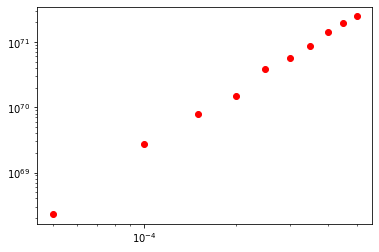

In [46]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xscale('log')
ax.set_yscale('log')

x = freq
y = flux_dens
ax.plot(x, y, 'ro')
plt.show()

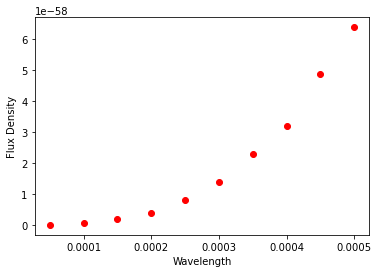

In [11]:
# SED, wavelength vs flux density
x = freq
y = flux_dens
plt.plot(x,y,'ro')
plt.xlabel("Wavelength")
plt.ylabel("Flux Density")
plt.show()

<ipython-input-7-e27f28d8ee9d>:10: RuntimeWarning: divide by zero encountered in double_scalars
  B = (2 * h * x**3 / c**2) / (np.exp(h * x / (k * Tdust)) - 1)
<ipython-input-7-e27f28d8ee9d>:11: RuntimeWarning: invalid value encountered in double_scalars
  return 10**a*(1-np.exp(-(x/nu0)**beta))*B #returns the bb flux density at the specified redshift


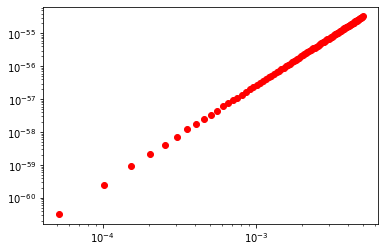

In [36]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xscale('log')
ax.set_yscale('log')

frequency = np.linspace(1e-6, 5000e-6, num=100)
flux_D=[]
for i in frequency:
    val = bb(i, 3, 20, 1, 1)
    flux_D.append(val)
    
ax.plot(frequency, flux_D, 'ro')
plt.show()


In [ ]:
T_CMB = 2.73 # Kelvin
x1 = 230e9 # Hz
flux_230 = bb(x1, z= ,Tdust=  , 1)
x2 = 3e8/850e-3 # convert to frequency, Hz
flux_850 = bb(x2, z= ,Tdust= , 1)
ratio = flux_230/flux_850